## Importing necessary libraries

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis

import numpy as np  # library used for working with arrays

import matplotlib.pyplot as plt  # library for visualization

import seaborn as sns  # library for visualization

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

# Binomial Distribution

### Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.  Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.

**a) What is the probability that none of the LED bulbs are defective?**

In [14]:
from scipy.stats import binom 

p=0.05 #defective 
n=10 #sample size 
k=np.arange(0,10)

binomial= binom.pmf(k=k, n=n, p=p)
binomial[0] #9.765625000000091e-14

0.5987369392383789

Text(0.5, 1.0, 'not defective')

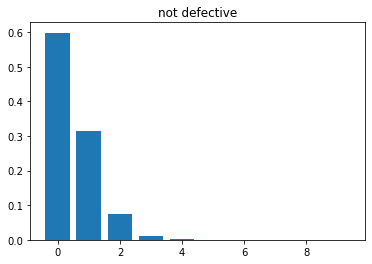

In [15]:
plt.bar(k, binomial)
plt.title('not defective')

**b) What is the probability that exactly one LED bulb is defective?**

In [17]:
binomial= binom.pmf(k=k, n=n, p=0.05) #in this case p=defective=success
binomial[1] #0.31512470486230504
#plt.bar(k, binomial)
#plt.title('Defective')

0.31512470486230504

**c) What is the probability that two or fewer LED bulbs are defective?**

Hint: We need to calculate cumulative probability of two or fewer LED bulbs being defective.

In [13]:
cumulative_binomial = stats.binom.cdf(k,n,p)
#0.9884964426207031 = 98.8%

0.9884964426207031

**d) What is the probability that three or more LED bulbs are defective?**

Hint: We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [14]:
1- binom.cdf(k=2, n=n, p=0.05)
#0.01150355737929687 = 1.15%

0.01150355737929687

### Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of free-throw shots is 93%. Find the following probabilities.

**a) What is the probability that the player will convert both the shots?**

In [5]:
from scipy.stats import binom 
k=np.arange(0,2)
binom.pmf(k=2, n=2, p=0.93)
#0.8649000000000001

0.8649000000000001

**b) What is the probability that the player will convert at least one shot?**

In [18]:
1- binom.pmf(k=0, n=2, p=0.93)
#0.1350999999999999

0.9951

### Q3.	Over a long period in a large multinomial corporation, 10% of all sales trainees rated as outstanding, 75% rated as excellent, 10% rated as satisfactory, and 5% are considered unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.

**a) Two are rated as outstanding**

In [19]:
from scipy.stats import binom 

binomial= binom.pmf(k=2,n=10,p=0.10)
binomial
#0.19371024450000005 -> 19%

0.19371024450000005

**b) Two or more are rated as outstanding**

In [21]:
#P(x>=2)
1-binom.cdf(k=1,n=10,p=.10)
# 7%

0.2639010708999998

**c) Eight of the ten are rated either outstanding or excellent**

In [23]:
binomial= binom.pmf(k=8,n=10,p=0.85)
print(binomial)

0.27589665660205087


**d) None of the trainees are rated as unsatisfactory**

In [13]:
binomial= binom.pmf(k=0,n=n,p=0.05)
binomial #59.87%

0.5987369392383789

# Uniform Distribution

### Q4. A University records the time taken by students to solve the statistics assignment in 'assignment.csv’. Plot the probability distribution this data follows and answer the following questions.

In [25]:
import scipy.stats as stats
from scipy.stats import uniform 

In [46]:
data=pd.read_csv('assignment.csv')
data.head(10)
data.info

<bound method DataFrame.info of      Student_ID  Time_taken
0           955        2.79
1           379        3.32
2           922        1.35
3           312        2.35
4           670        1.98
..          ...         ...
995         258        2.38
996         666        3.71
997         398        2.44
998          32        2.42
999         980        2.79

[1000 rows x 2 columns]>

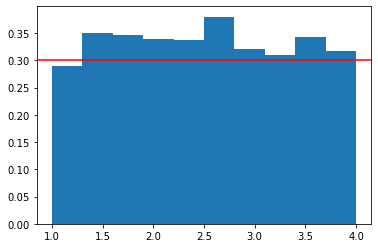

In [34]:
plt.hist(data['Time_taken'], density=True)
plt.axhline(0.30, color='red')

#histogram is a continuous function in this case 

In [38]:
data['Time_taken'].max() #4
data['Time_taken'].min() #1

1.0

In [47]:
# use the uniform.pmf() function to generate the probability distribution
x = np.linspace(1, 4, 50)
probs = uniform.pdf(x, loc = 1, scale = 3)

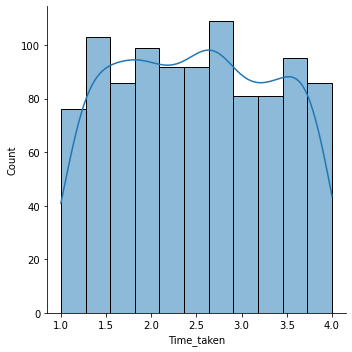

In [35]:
sns.displot(data['Time_taken'], kde=True)

**a) Find the probability that a randomly selected student requires at most 2.5 hours to complete the assignment.**

**CDF:** of a random variable (X) is the probability that X will take the value less than or equal to x. It can be represented mathematically as below:

>$F_X(x) = P(X\leq x)$

In our case, the random variable (X) is the number of hours.

$ P(X\leq 2.5)$

In [48]:
uniform.cdf(x=2.5, loc=1, scale=3) #0.5

0.5

**b) Find the probability that a randomly selected student requires at least 3 hours to complete the quiz.**

$ P(X>=3)$

In [50]:
1-uniform.cdf(x=3, loc=1, scale=3)

0.33333333333333337

**c) Find the probability that a randomly selected student requires 1.5 to 3.5 hours to complete the quiz.**

$ P(1.5<= X <=3.5)$

In [51]:
uniform1=uniform.cdf(x=1.5, loc=1, scale=3) #0.125
uniform2=uniform.cdf(x=3.5, loc=1, scale=3) #0.625
uniform2-uniform1 #0.5

0.6666666666666667

# Normal Distribution

### Q5. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.

**a) What is the probability that a randomly selected cell phone bill is more than Rs 1200?**

In [54]:
import scipy.stats as stats 
from scipy.stats import norm

x_bar=850
sd=150

prob_1200=1- norm.cdf(1200, x_bar,sd)
prob_1200

0.009815328628645315

**b) What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?**

In [56]:
prob_750=norm.cdf(750, x_bar,sd)
prob_1200= norm.cdf(1200, x_bar,sd)

prob=prob_1200- prob_750
prob

0.7376921338244318

**c) What is the probability that a randomly selected cell phone bill is no more than Rs 650?**

In [58]:
prob_650= norm.cdf(650, x_bar, sd)
prob_650

0.09121121972586788

**d) What is the amount above which lies the top 15% of cell phone bills?**

In [59]:
norm.ppf(0.85, x_bar, sd)

1005.4650084240685

**e) What is the amount below which lies the bottom 25% of cell phone bills?**

In [60]:
norm.ppf(0.25, x_bar, sd)

748.8265374705877

### Q6. The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.

**a) What is the probability that the bottle filled less than 480 ml?**

In [62]:
mu=500
sd=20 
x1=480
z1=(x1-mu)/sd
norm.cdf(z1)

0.15865525393145707

**b) What is the probability that the bottle filled more than 520 ml?**

In [63]:
mu=500
sd=20 
x1=520
z2=(x1-mu)/sd
1-norm.cdf(z2)

0.15865525393145707

**c) What is the probability that the bottle filled between 470 ml to 525 ml?**

In [64]:
mu=500
sd=20 
x1=470
z1=(x1-mu)/sd
prob1=norm.cdf(z1)

x2=525
z2=(x2-mu)/sd
prob2=norm.cdf(z2)

prob2-prob1


0.8275430250642866

### Q7. In 2 Liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [65]:
mu=2
sd=0.05

x1=1.9
z1=(x1-mu)/sd
p1=norm.cdf(z1)

x2=2
z2=(x2-mu)/sd
p2=norm.cdf(z2)

p2-p1

0.4772498680518209

**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [66]:
x1=1.9
z1=(x1-mu)/sd
p1=norm.cdf(z1)

x2=2.1
z2=(x2-mu)/sd
p2=norm.cdf(z2)

p2-p1

0.9544997361036418

**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [70]:
x1=1.9
z1=(x1-mu)/sd
p1=norm.cdf(z1)

x2=2.1
z2=(x2-mu)/sd
p2=1-norm.cdf(z2)

print(p1+p2)

0.045500263896358195


**d) 99% of the bottles contain at least what amount of soft drink in them?**

In [72]:
norm.ppf(0.01, mu, sd)

1.883682606297958

# Sampling Distribution

### Q8. Suppose an automobile battery manufacturer claims that the mean lifetime of their battery is 60 months with a standard deviation of 6 months. Suppose the distribution of battery life is approximately normal. Find the probability that the mean lifetime of 40 randomly sampled batteries will be less than 58 months.

In [75]:
mu=60
sigma=6 
n=40
x_bar= 58
s = sigma/np.sqrt(40)

round(norm.cdf(58, loc = mu, scale = s), 4)

0.0175

# Interval Estimation

### Q9. A random sample of 40 households was selected as part of a study on electricity usage, and the number of kilowatt-hours (kWh) was recorded for each household in the sample for the first quarter of 2020. The average usage was found to be 310 kWh. In a very large study in the first quarter of the previous year, it was found that the standard deviation of the usage was 89 kWh.

### Assuming the standard deviation is unchanged and that the usage is normally distributed, provide an expression for calculating a 95% confidence interval for the mean usage in the first quarter of 2019. 

In [76]:
x_bar=310
sigma=89
n=40
np.round(norm.interval(0.95, loc=x_bar, scale=sigma/np.sqrt(n)),2)

array([282.42, 337.58])